<a href="https://colab.research.google.com/github/OJShearer/Learning/blob/main/Classification_with_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

Dataset contains health statistics for people along with labels of whether they have had a stroke or not.

### Q. Identify candidate questions for your machine learning project

Main question is classification, predicting whether someone will have a stroke given data on their health.

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [112]:
import pandas as pd
import numpy as np

In [113]:
# https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [114]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [116]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [117]:
data.set_index('id',inplace=True)

### Q. Generate a descriptive statistics report for the columns in your dataset

In [118]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

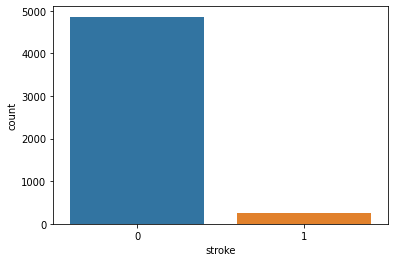

In [120]:
# Is it a balanced data set?
sns.countplot(x='stroke', data=data)

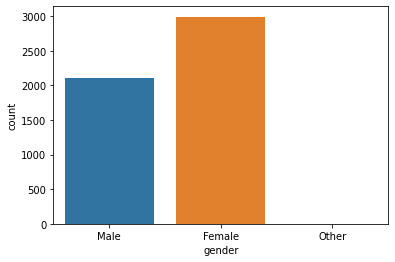

In [121]:
sns.countplot(x='gender', data=data)

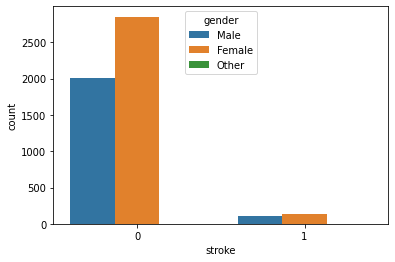

In [122]:
sns.countplot(x='stroke', data=data, hue='gender')

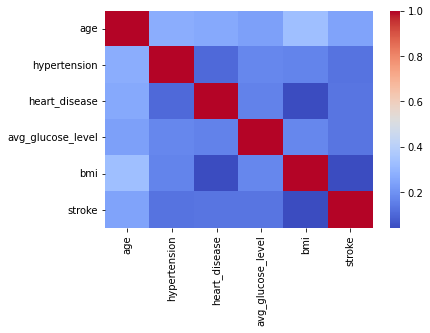

In [123]:
sns.heatmap(data.corr(), cmap='coolwarm')

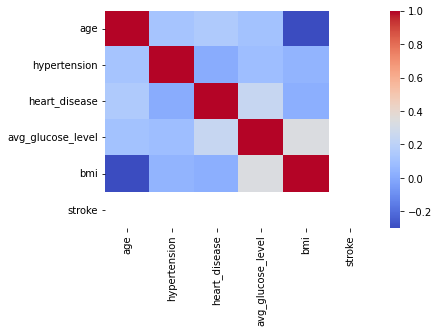

In [124]:
sns.heatmap(data[data['stroke']==1].corr(), cmap='coolwarm')

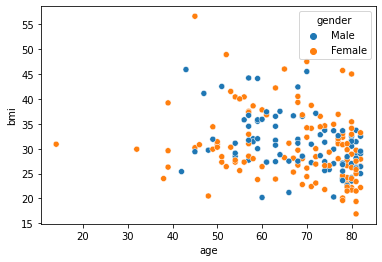

In [125]:
stroke_t = data[data['stroke']==1]
sns.scatterplot(x='age',y='bmi',data=stroke_t,hue='gender')

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [126]:
# Only null values in bmi column, with 201 nulls missing at random
# Less than 4% of values so could drop
# Could also impute off gender and age
# Will drop for now

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [127]:
# Convert gender, ever_married, Residence_type columns to binary representations
data['gender'] = data['gender'].map(lambda x: 1 if x=='Female' else 0)
data['ever_married'] = data['ever_married'].map(lambda x: 1 if x=='Yes' else 0)
data['Residence_type'] = data['Residence_type'].map(lambda x: 1 if x=='Urban' else 0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 460.2+ KB


In [128]:
# work_type and smoking_status convert to number or one-hot encode
# work_type definitely one-hot, smoking status values show over 1400 are unknown so will drop this column
data.drop('smoking_status',axis=1,inplace=True)

In [129]:
data = pd.get_dummies(data=data, columns=['work_type'],drop_first=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
id,,,,,,,,,,,,,
9046,0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0
31112,0,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0
60182,1,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0
1665,1,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0
56669,0,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0


# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [130]:
from sklearn.model_selection import train_test_split

X = data.drop('stroke',axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [134]:
# Base metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Loop through different models
for algo in [RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC(), XGBClassifier(), LGBMClassifier()]:
  model = algo
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(accuracy_score(y_test, predictions))
  print(f1_score(y_test, predictions))
  print('*******')

0.9524779361846571
0.0
*******
0.5302104548540394
0.145679012345679
*******
0.9131025118805159
0.14666666666666667
*******
0.9511201629327902
0.02702702702702703
*******


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.956551255940258
0.0
*******
0.955193482688391
0.0
*******
0.9504412763068567
0.02666666666666667
*******


Data set is very unbalanced, models getting high accuracy but very low recall - results just predict all to be no stroke. Attempt with SMOTE to balance classes and improve models.

In [135]:
data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [150]:
from imblearn.over_sampling import SMOTE
# SMOTE to create samples giving minority 30% representation in training
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [144]:
for algo in [RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC(), XGBClassifier(), LGBMClassifier()]:
  model = algo
  model.fit(X_train_res, y_train_res)
  predictions = model.predict(X_test)
  print(accuracy_score(y_test, predictions))
  print(f1_score(y_test, predictions))
  print('*******')

0.9253224711473184
0.12698412698412698
*******
0.37949762389680924
0.12284069097888677
*******
0.8771215207060421
0.08121827411167512
*******
0.856754921928038
0.1660079051383399
*******


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9321113374066531
0.10714285714285714
*******
0.9178547182620502
0.14184397163120568
*******
0.9280380176510523
0.10169491525423728
*******


In [151]:
# Looks like xgboost may give best results

mod = XGBClassifier()
mod.fit(X_train_res,y_train_res)
y_pred = mod.predict(X_test)

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [153]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1199  210]
 [  37   27]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1409
           1       0.11      0.42      0.18        64

    accuracy                           0.83      1473
   macro avg       0.54      0.64      0.54      1473
weighted avg       0.93      0.83      0.88      1473

